In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, classification_report
                             , recall_score, f1_score)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
df= pd.read_csv('/content/TelcoCustomers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [14]:
{col: df[col].unique() for col in df.columns}


{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], 

4.	Преобразовать TotalCharges в числовой тип.

In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df["TotalCharges"].dtype)


float64


In [16]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)


7.	Средний tenure, MonthlyCharges, TotalCharges.

In [17]:
mean_values = df[["tenure", "MonthlyCharges", "TotalCharges"]].mean()

print(mean_values)

tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2279.734304
dtype: float64


In [18]:
for col in ["Contract", "InternetService", "Churn"]:
    print(f"\n=== {col} ===")
    display(df[col].value_counts().to_frame("Count"))


=== Contract ===


,Count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



=== InternetService ===


,Count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



=== Churn ===


,Count
Churn,
No,5174
Yes,1869


9.	Средние показатели по группам Churn.

In [19]:
group_means = df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()

print(group_means)

          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2549.911442
Yes    17.979133       74.441332   1531.796094


10.	Количество клиентов с tenure < 3 месяцев.

In [20]:
count_clients = df[df["tenure"] < 3].shape[0]

print("Количество клиентов с tenure < 3 месяцев:", count_clients)

Количество клиентов с tenure < 3 месяцев: 862


11.	Доля клиентов с MonthlyCharges > 100.

In [22]:
share = (df["MonthlyCharges"] > 100).mean()
share_percent = share * 100
print(f"Доля клиентов с MonthlyCharges > 100: {share_percent:.2f}%")

Доля клиентов с MonthlyCharges > 100: 12.81%


12.	Группировка по Contract — средний TotalCharges.


In [24]:
avg_total_by_contract = df.groupby("Contract")["TotalCharges"].mean()

print(avg_total_by_contract)

Contract
Month-to-month    1369.254581
One year          3032.622878
Two year          3706.934336
Name: TotalCharges, dtype: float64


Визуализация
13.	hist / distplot по MonthlyCharges, tenure, TotalCharges.


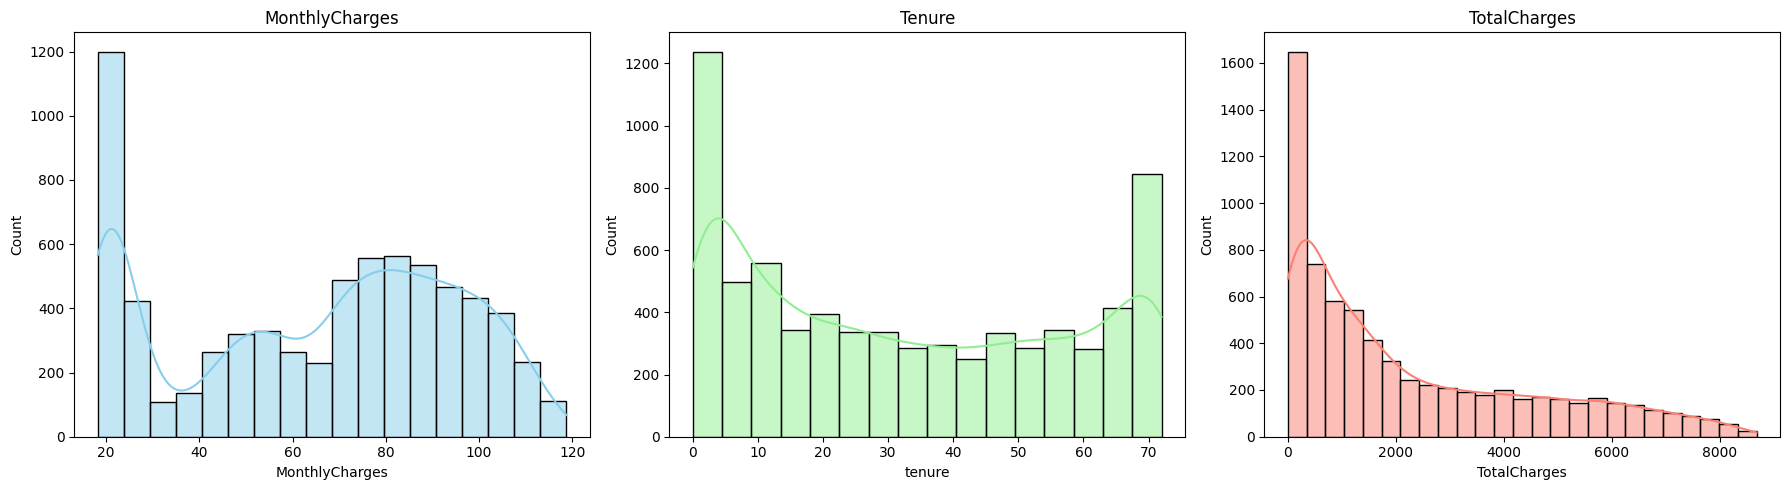

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["MonthlyCharges"], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("MonthlyCharges")

sns.histplot(df["tenure"], kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Tenure")

sns.histplot(df["TotalCharges"], kde=True, ax=axes[2], color="salmon")
axes[2].set_title("TotalCharges")

plt.tight_layout()
plt.show()

14.	boxplot: Churn vs MonthlyCharges.

/tmp/ipython-input-2083659974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")


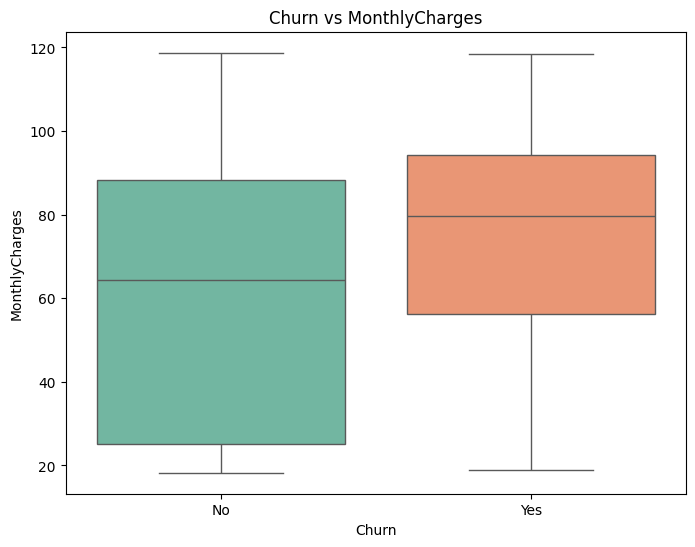

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Churn vs MonthlyCharges")
plt.show()

15.	barplot: Churn vs Contract.


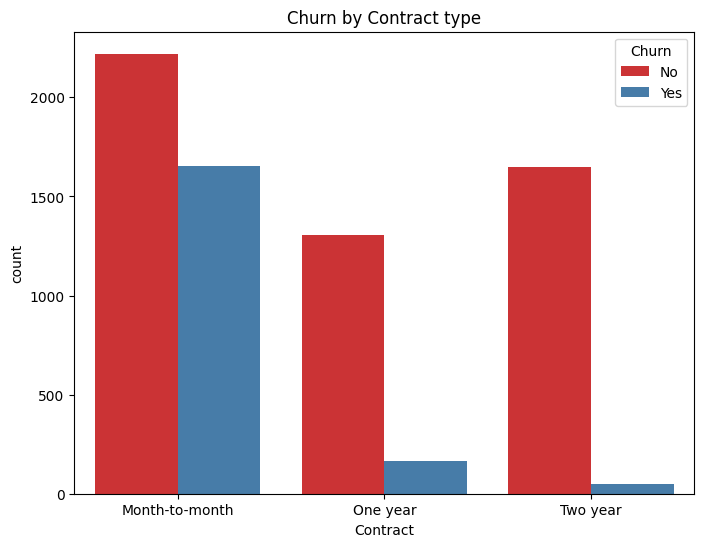

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set1")
plt.title("Churn by Contract type")
plt.show()

16.	heatmap корреляций числовых признаков.


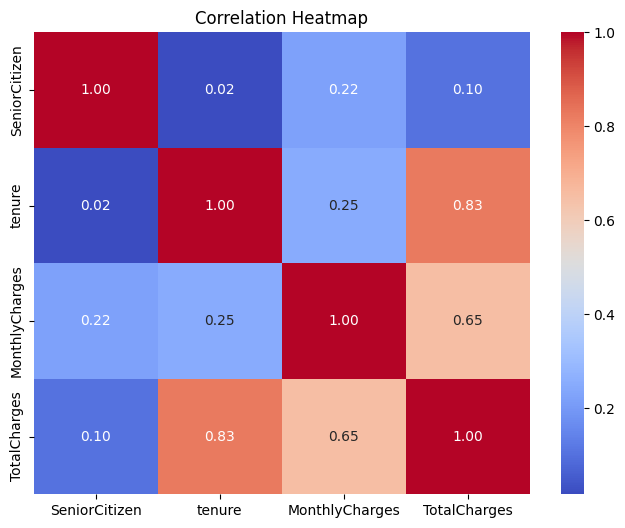

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

17.	pairplot по числовым признакам + Churn.


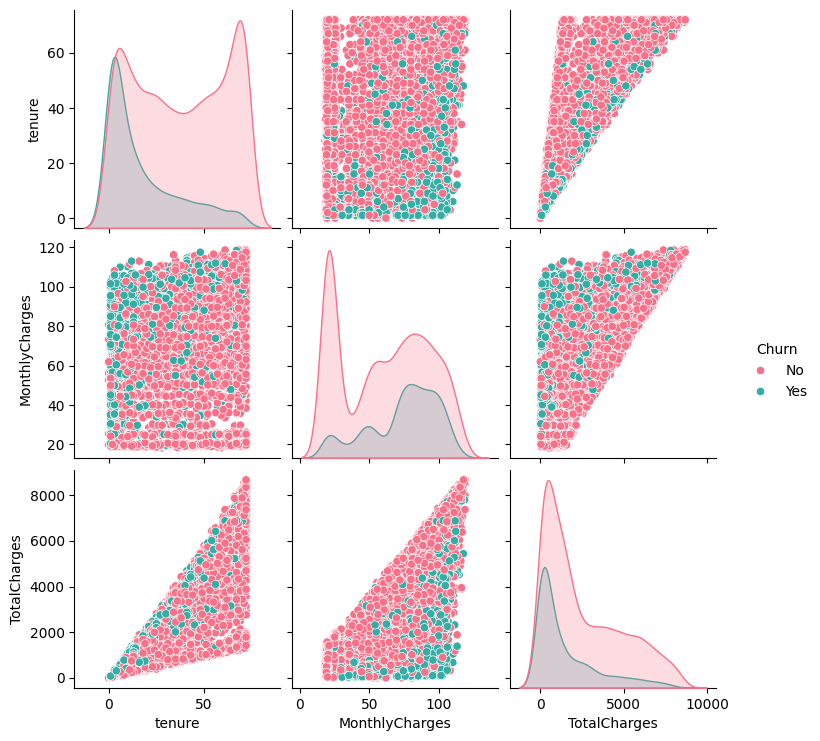

In [29]:
sns.pairplot(
    df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]],
    hue="Churn",
    diag_kind="kde",
    palette="husl"
)
plt.show()

ЭТАП 2: Предобработка
18.	Проверить пропущенные значения и заполнить/удалить.



In [30]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
df1 = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Churn']]
df1

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,OnlineSecurity,TechSupport,Churn
0,1,29.85,29.85,Month-to-month,DSL,No,No,No
1,34,56.95,1889.50,One year,DSL,Yes,No,No
2,2,53.85,108.15,Month-to-month,DSL,Yes,No,Yes
3,45,42.30,1840.75,One year,DSL,Yes,Yes,No
4,2,70.70,151.65,Month-to-month,Fiber optic,No,No,Yes
...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,One year,DSL,Yes,Yes,No
7039,72,103.20,7362.90,One year,Fiber optic,No,No,No
7040,11,29.60,346.45,Month-to-month,DSL,Yes,No,No
7041,4,74.40,306.60,Month-to-month,Fiber optic,No,No,Yes


In [48]:
df1['Churn'].unique()

array([nan])

In [58]:
df1 = df1.copy()
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

float_cols = ["MonthlyCharges", "TotalCharges"]
df1.loc[:, float_cols] = df1[float_cols].apply(pd.to_numeric, errors="coerce")

int_like_cols = ["tenure"]
df1.loc[:, int_like_cols] = (
    df1[int_like_cols]
    .apply(pd.to_numeric, errors="coerce")
    .astype("Int64")
)

if "Churn" in df1.columns:
    df1.loc[:, "Churn"] = (
        df1["Churn"].astype(str).str.strip().map({"Yes": 1, "No": 0}).astype("Int64")
    )

if "Contract" in df1.columns:
    df1.loc[:, "Contract"] = (
        df1["Contract"].astype(str).str.strip().map({
            "Month-to-month": 0, "One year": 1, "Two year": 2
        }).astype("Int64")
    )

if "InternetService" in df1.columns:
    df1.loc[:, "InternetService"] = (
        df1["InternetService"].astype(str).str.strip().map({
            "DSL": 0, "Fiber optic": 1, "No": 2
        }).astype("Int64")
    )

In [63]:
for col in df1.columns:
    if col not in ['MonthlyCharges', 'TotalCharges']:
        df1[col] = df1[col].fillna(0).astype(int)


In [64]:
df1

,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_1,OnlineSecurity_2,TechSupport_1,TechSupport_2
0,1,29.0,29.0,0,0,0,0,0
1,34,56.0,1889.0,0,0,1,0,0
2,2,53.0,108.0,0,0,1,0,0
3,45,42.0,1840.0,0,0,1,0,1
4,2,70.0,151.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7038,24,84.0,1990.0,0,0,1,0,1
7039,72,103.0,7362.0,0,0,0,0,0
7040,11,29.0,346.0,0,0,1,0,0
7041,4,74.0,306.0,0,0,0,0,0


In [65]:
scaler = StandardScaler()
features = df1.drop(columns=['Churn'])
scaled_data = scaler.fit_transform(features)

In [66]:
x = scaled_data
y = df['Churn']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
model_lg = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [72]:
model_lg.fit(x_train, y_train)

LogisticRegression()

In [73]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
y_predict_lg = model_lg.predict(x_test)
y_predict_tree = model_tree.predict(x_test)
y_predict_rf = model_rf.predict(x_test)

In [76]:
print('accuracy_score:')
print(f'Model Log: {accuracy_score(y_test, y_predict_lg)}')
print(f'Model Tree: {accuracy_score(y_test, y_predict_tree)}')
print(f'Model Rf: {accuracy_score(y_test, y_predict_rf)}')

accuracy_score:
Model Log: 0.8019872249822569
Model Tree: 0.7395315826827538
Model Rf: 0.7863733144073811


In [77]:
print('precision_score:')
print(f'Model Log Precision: {precision_score(y_test, y_predict_lg, pos_label="Yes")}')
print(f'Model Log Recall: {recall_score(y_test, y_predict_lg, pos_label="Yes")}')
print(f'Model Log F1: {f1_score(y_test, y_predict_lg, pos_label="Yes")}')

precision_score:
Model Log Precision: 0.6556291390728477
Model Log Recall: 0.5308310991957105
Model Log F1: 0.5866666666666667


In [78]:
print('recall_score:')
print(f'Model Tree Precision: {precision_score(y_test, y_predict_tree, pos_label="Yes")}')
print(f'Model Tree Recall: {recall_score(y_test, y_predict_tree, pos_label="Yes")}')
print(f'Model Tree F1: {f1_score(y_test, y_predict_tree, pos_label="Yes")}')

recall_score:
Model Tree Precision: 0.5081521739130435
Model Tree Recall: 0.5013404825737265
Model Tree F1: 0.50472334682861


In [79]:
print('f1_score:')
print(f'Model RF Precision: {precision_score(y_test, y_predict_rf, pos_label="Yes")}')
print(f'Model RF Recall: {recall_score(y_test, y_predict_rf, pos_label="Yes")}')
print(f'Model RF F1: {f1_score(y_test, y_predict_rf, pos_label="Yes")}')

f1_score:
Model RF Precision: 0.6216216216216216
Model RF Recall: 0.4932975871313673
Model RF F1: 0.5500747384155455


In [80]:
print('classification_report:')
print(f'Model Log: {classification_report(y_test, y_predict_lg)}')
print(f'Model Tree: {classification_report(y_test, y_predict_tree)}')
print(f'Model Rf: {classification_report(y_test, y_predict_rf)}')

classification_report:
Model Log:               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Model Tree:               precision    recall  f1-score   support

          No       0.82      0.83      0.82      1036
         Yes       0.51      0.50      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Model Rf:               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1036
         Yes       0.62      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg      

In [81]:
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']